# Week4_DataVisualization

In the last section, we introduced various data munipulation skills and presented the results in DataFrame using pandas; however, some of the results can be displayed more intuitively by plotting e.g., scatterplot and trend lines, rather than simply showing the plain tables alone. In this part, you will be enaged in visualizing DataFrame using various kinds of plotting choices that are provided by the matplotlib and seaborn packages.

After this week's lesson you should be able to:
- Create line, scatter, histogram, box, bar plots in matplotlib
- Combine multiple plots
- Use seaborn to create plots


Part of this week's lessons are adapted from:
- [The Python Data Science Handbook - Jupyter Notebook version](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.08-More-IPython-Resources.ipynb)



First, we need to import the **matplotlib** package. Also, to make matplotlib figures show up in notebooks, include this line in your notebooks: **%matplotlib inline**. Including this command ensures that the plot is rendered directly in the notebook.

Also import the package **Seaborn**. Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics, generally with a better looking than merely using matpolitlib 

In [40]:
# We are going to start importing the libraries we need all in one cell. 
# It is a good practice to keep all the imports in one cell so that
# we can easily see what libraries we are using in the notebook.

#  importing the pyplot module from the matplotlib library and giving it an alias plt
from matplotlib import pyplot as plt 

# this command ensures that the plot is rendered directly in the notebook
%matplotlib inline

import seaborn as sns

import pandas as pd
import numpy as np

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# 1. Basics of Matplotlib
 

<img src="https://github.com/wenzhengli-etal/CRP3850_summer/blob/main/Week1_5_Visualization/img/matplotlib_illustration.jpg?raw=true" alt="matplotlib_illustration.jpg" width="500"/>

A basic plot generated by the matplotlib library consists of the following two components: 

**[figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure)**: The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. A figure can contain any number of Axes, but will typically have at least one.



**[Axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)**: This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. Each Axes has a title, an x-label, and a y-label, etc.


The figure below shows the relationship between *figure* and *axes*. The whole figure consists of three axes.

<img src="img/figureaxes.jpg" style="width:400px; height:200px"/> 


For all Matplotlib plots, we start by creating the **figure** and **axes**. In their simplest form, a figure and axes can be created as follows:

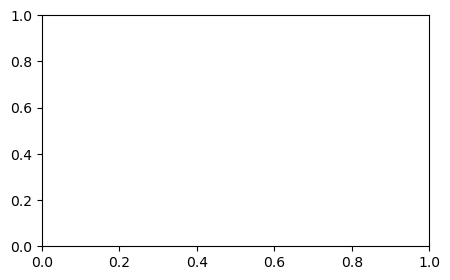

In [11]:
# a figure with a single Axes
fig = plt.figure(figsize=(5, 3))
ax = plt.axes()

# or simply we can use: 
# fig, ax = plt.subplots() 

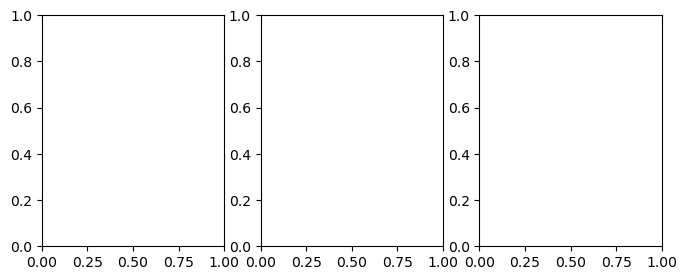

In [12]:
#  a figure with a 1x3 grid of Axes (1 row, 3 columns just like the figure one)
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

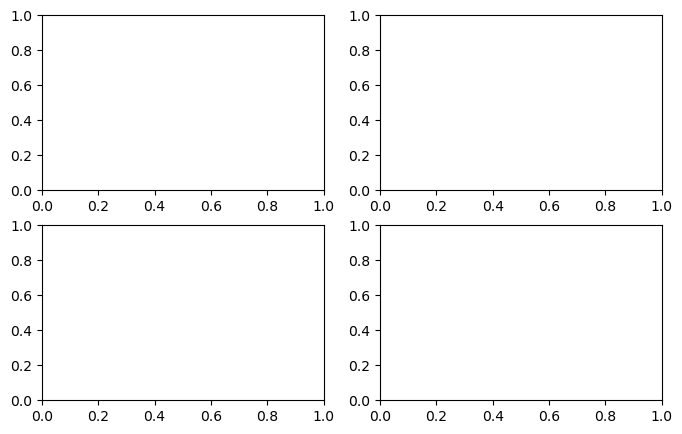

In [17]:
# a figure with a 2x2 grid of Axes (2 row, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

# 2. Basic parameter setting for plotting

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type. 

In this case, we use a `Matplotlib's state-based (plt) interface` method to define plot, which does not explicitly define the `Axes` object. Instead, it implicitly creates a `Figure` and an `Axes` behind the scenes. We will cover `object-oriented (OO)` approach，explicitly defining the ·Axes· in the next session.  


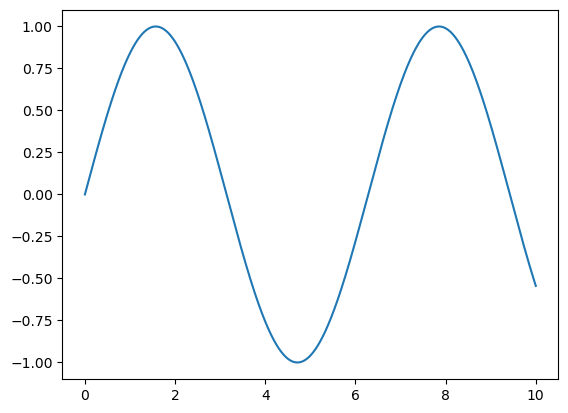

In [15]:
x = np.linspace(0, 10, 1000)
# an array of evenly spaced values, starting at 0, ending at 10, 1000: the number of samples to generate. 
plt.plot(x, np.sin(x)) 
# np? short for numpy, a library for numerical computing

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

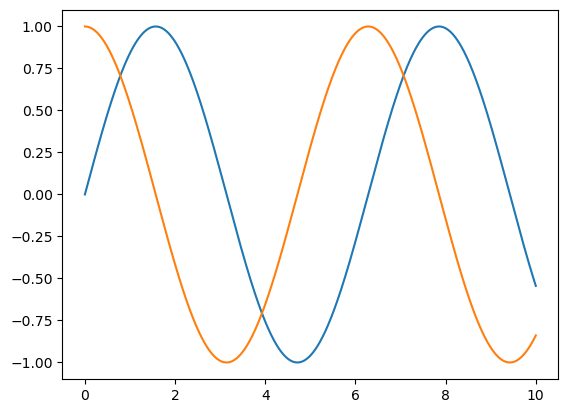

In [21]:
# let us plot a 
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### 2.1 Adjusting the Plot: Line Colors and Styles
The first adjustment you might wish to make to a plot is to control the line colors and styles.
- The ``plt.plot()`` function takes additional arguments that can be used to specify these.
- To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color.
- If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.
  
The color can be specified in a variety of ways (see code below). You might find the following links particularly helpful to find the appropriate colors.
- List of named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
- colorbrewer2: https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=6
    - color format in colorbrewer2:
        - A hexadecimal code (e.g., #2ca25f) commonly used in web design
        - RGB: A format specifying red, green, and blue values
        - CMYK: primarily used in printing

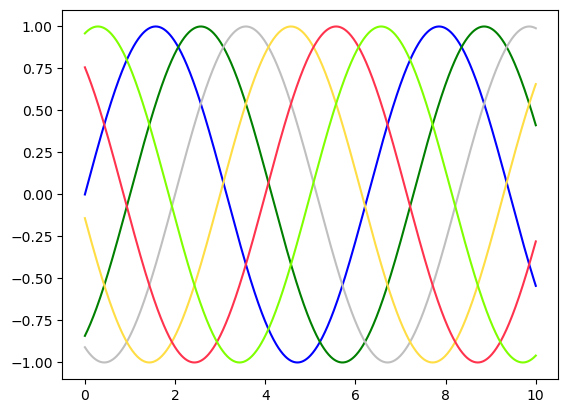

In [27]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Similarly, the line style can be adjusted using the [linestyle](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) keyword:

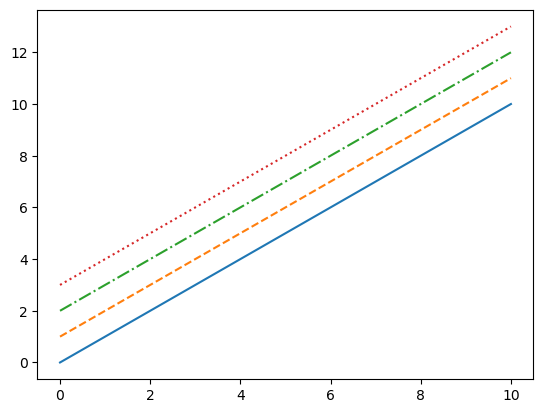

In [31]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
#plt.plot(x, x + 4, linestyle='-')  # solid
#plt.plot(x, x + 5, linestyle='--') # dashed
#plt.plot(x, x + 6, linestyle='-.') # dashdot
#plt.plot(x, x + 7, linestyle=':');  # dotted

### 2.2 Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.

The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

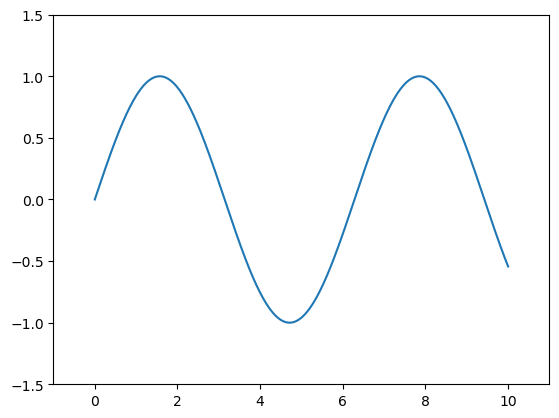

In [32]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:

(1.2, -1.2)

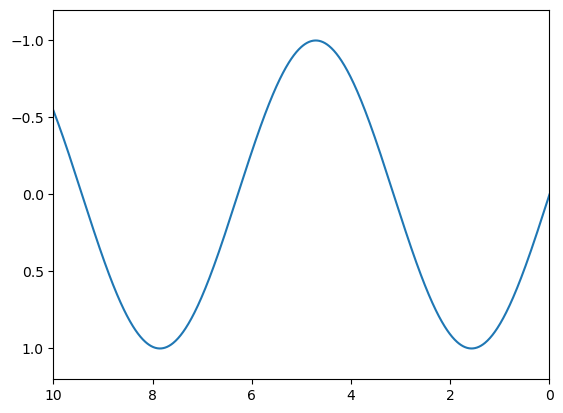

In [33]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2)

A useful related method is ``plt.axis()`` (note here the potential confusion between *axes* with an *e*, and *axis* with an *i*).
The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

(-1.0, 11.0, -1.5, 1.5)

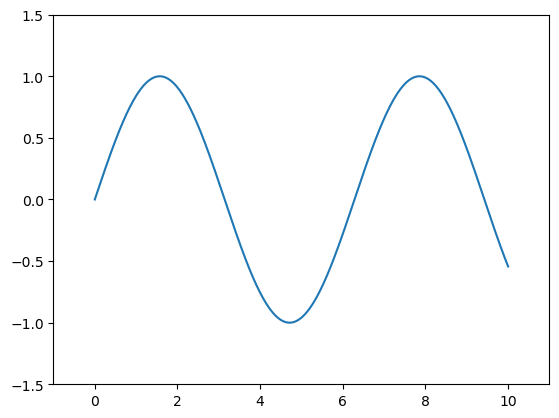

In [34]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]) # xmin, xmax, ymin, ymax

It allows even higher-level specifications, such as ensuring an equal aspect ratio so
that on your screen, one unit in x is equal to one unit in y

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

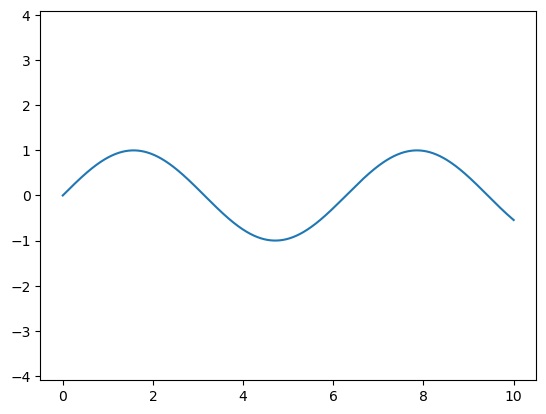

In [21]:
plt.plot(x, np.sin(x))
plt.axis('equal')  # try "tight", "off", "scaled", etc...

### 2.3 Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: **titles, axis labels, and simple legends**.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

Text(0, 0.5, 'sin(x)')

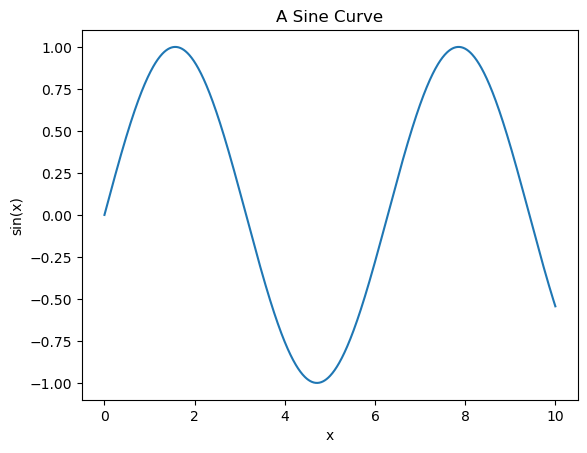

In [35]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
- to show a legend, use the ``plt.legend()`` method.
- to specify the label of each line, use the ``label`` keyword of the plot function.

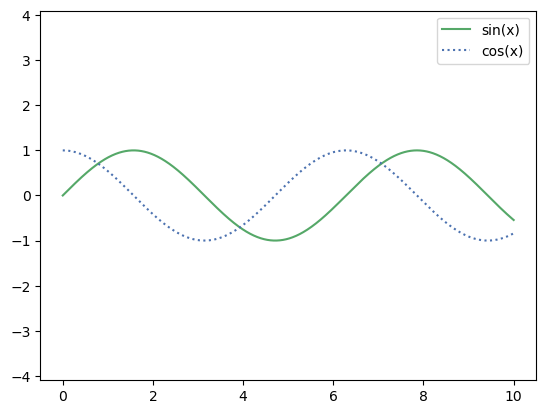

In [22]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend()

### 2.4 Matplotlib Gotchas

In Matplotlib, there are two primary ways to create plots: 
- using the `MATLAB-like interface (plt function method)` and
- using the `object-oriented interface with Axes objects (ax methods)`.

Both approaches are capable of producing the same plots, but they offer different styles of interaction and control.

Let us first look at the differences between these two methods. 

- 1. `plt function method`:
    - implicitly creates a `Figure` and an `Axes` behind the scenes

Text(0, 0.5, 'sin(x)')

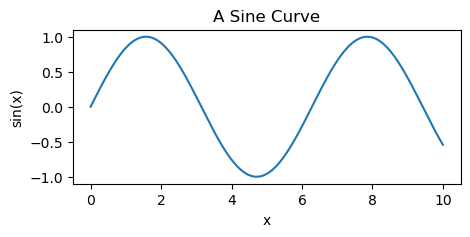

In [28]:
# 1. plt interface functions
plt.figure(figsize=(5, 2)) 
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")

- 2. the object-oriented (ax) method: 
    - explicitly define the `figure` (an instance of the class ``plt.Figure``) and the `axes` (an instance of the class ``plt.Axes``) 
    - use the ``ax.plot`` function to plot data. 

Text(0, 0.5, 'sin(x)')

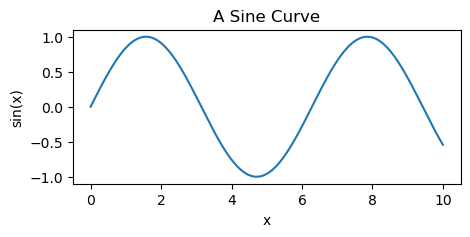

In [26]:
# ax method: 
fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(x, np.sin(x))
ax.set_title("A Sine Curve")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")

Most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style `plt` functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once.

| **State-Based (`plt`)**              | **Object-Oriented (`fig, ax`)**              |
|--------------------------------------|----------------------------------------------|
| Implicitly creates Axes.             | Explicitly creates and controls Axes.        |
| Easier for quick, simple plots.      | Better for complex layouts and customization. |




### 2.5 Changing the plotting style

Matplotlib’s default plot settings are often the subject of complaint among its users. 

To create visually pleasing plots, Matplotlib offers convenient style 
module, which includes a number of new default stylesheets, as well as the abilit to 
create and package your own styel. The available styles are listed in `plt.style.available`. Here I list only several for brevity:s.

- `plt.style.use('default')`: this is the matplotlib default
- `plt.style.use('seaborn-darkgrid')`: seaborn-darkgrid style
- `plt.style.use('ggplot')`: ggplot style

In [29]:
# show a list the available style sheets 
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Text(0, 0.5, 'sin(x)')

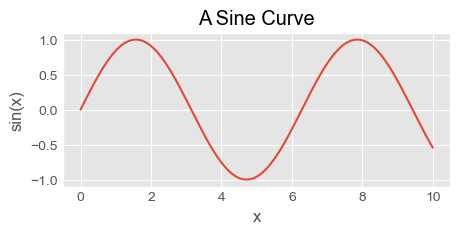

In [38]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(x, np.sin(x))
ax.set_title("A Sine Curve")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")

## 3. Basic plots for pandas DataFrame

Let us now load the final housing dataset we exported last week (also available on Canvas->Week4). 

Pandas can be used to create graphs and visualize data, thanks to its lightweight syntax and `matplotlib functions` (pandas plotting features are a wrapper around the matplotlib library). 

To build a chart with pandas, we have three ways: 

1. plot method: we specify the kind of chart we want to create within the `.plot()` function.
```python
df.plot('x', 'y', kind='line')
plt.show()
```
2. function name method: call the right function name to create the chart we want. Pandas supports multiple plot types via the kind argument in [df.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
```python
df.line('x', 'y')
plt.show()
```
3. plot + function name method: a combination of the previous two. We use the plot method and need the function nameright after it.
```python
df.plot.line('x', 'y')
plt.show()
```

### 3.1 Scatterplot
#### 3.11 Scatterplot based on matplotlib and pandas

A **scatter plot** is extensively used in descriptive analysis for exploring the association of two variables. 
- We will now explore the relationship between two variables: `distance to the nearest subway station` and `housing price`. 

In [93]:
# import the combined dataset, and assign a name df_combine
df_combine = pd.read_excel("Housing_combine.xlsx")

In [94]:
# If you do not have the column "UnitPrice", run the following code: 
df_combine["UnitPrice"] = df_combine["TotalPrice"] / df_combine["Size"]


We can use the function `df.plot(kind = "scatter")` or `df.scatter()` to generate a scatter plot.

Now, let us create a scatterplot showing the relationship between unit housing price and distance to subway stations:

<Axes: xlabel='Dist2Subway', ylabel='UnitPrice'>

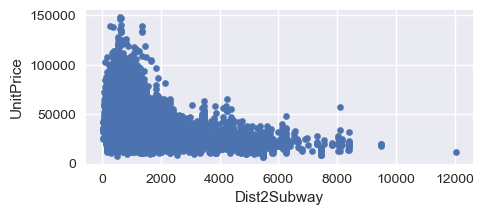

In [95]:
plt.style.use('seaborn-v0_8')

# define Figure and Axes
fig, ax = plt.subplots(figsize = (5,2))

# a scatter plot comparing Dist2Subway and UnitPrice
df_combine.plot(kind = "scatter",
                x = "Dist2Subway",
                y = "UnitPrice", 
                color = "b", 
                ax = ax)


In the above code:
- the first line `fig, ax =` initializes the two basic components&mdash;figure and axes, and presents them with the abbreviation&mdash;fig and ax. 
- `nrows=1, ncol=1` means the figure consists of one row and one column. In other words, there is only one Axes (plot) within the whole figure region. 
- `figsize = (5,3)` defines the width and length of the Axes(plot)&mdash;5 inches width by 3 inches height. 
- `ax = ax` means that the scatterplot is generated on the Axes called ax. There is only one Axes in our case, but you may deal with a combined figure later with multiple Axes (ax[1], ax[2],...).

Adding the artists (the legend, titles, labels, and ticks, etc.) can be done using the the specific function for each artist, commonly in the format of `ax.artist_name()`.

#### Change the parameters to create visually pleasing plots: 

- for more about matplotlib.pyplot.scatter: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html


Text(0.5, 1.0, 'Relationship')

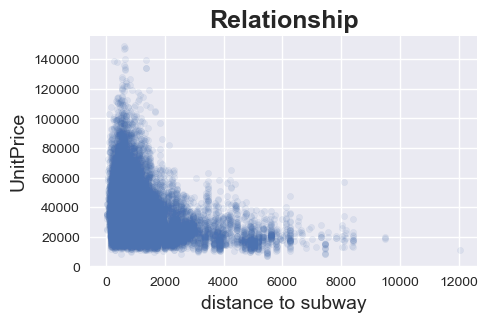

In [52]:
plt.style.use('seaborn-v0_8')

# define Figure and Axes
fig, ax_1 = plt.subplots(figsize = (5,3))

# a scatter plot comparing Dist2Subway and UnitPrice
df_combine.plot(kind = "scatter",
                x = "Dist2Subway",
                y = "UnitPrice", 
                color = "b", 
                s = 20, 
                alpha = 0.1,
                ax = ax_1)

# using the ax method to add title and customize the labels of x and y axis.
ax_1.set_xlabel("distance to subway", fontsize = 14)
ax_1.set_ylabel("UnitPrice", fontsize = 14)
ax_1.set_title("Relationship", fontsize = 18, fontweight = "bold")

**Arguments**: 
- `s`: specify the marker size
- `alpha`: the alpha blending value, between 0 (transparent) and 1 (opaque).
- `marker`: the type of symbol used for the plotting. The marker style has its own set of short-string codes. The full list of available symbols can be seen in https://matplotlib.org/stable/api/markers_api.html

#### 3.12 Scatterplot based on [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
Okay, now let us plot the relationship between Unit housing price and the district to subway stations using `seaborn`. Since seaborn is built on top of matplotlib, most of its concepts and vocabulary are still correct. More precisely, Seaborn is a wrapper of matplotlib, meaning that when you call a function in seaborn, it calls one or multiple matplotlib functions under the hood.

Some commonly used functions in [seaborn](https://seaborn.pydata.org/tutorial/function_overview.html):

<img src="https://github.com/wenzhengli-etal/CRP3850_summer/blob/main/Week1_5_Visualization/img/seaborn_functions.png?raw=true" alt="seaborn_functions.png" width="500"/>

- relplot() - High-level interface for creating scatter and line plots.
- scatterplot() - For creating scatter plots.
- lineplot() - For creating line plots.
- displot() - For creating distribution plots, including histograms and KDE.
- histplot() - For creating histograms.
- boxplot() - For creating box plots.
- violinplot() - For creating violin plots.
- heatmap() - For creating heatmaps.
- pairplot() - For creating a grid of scatter plots for pairwise relationships.
- catplot() - High-level interface for creating various categorical plots.

Text(0.5, 1.0, 'Relationship')

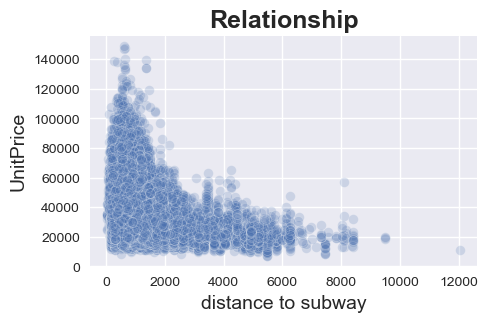

In [60]:
# set style

# Define Figure and Axes
fig, ax = plt.subplots(1, 1, figsize = (5,3))

# Create a scatter plot using Seaborn
sns.scatterplot(data = df_combine, 
                x = "Dist2Subway",
                y = "UnitPrice",
                color = "b", 
                s = 50, 
                alpha = 0.2, 
                ax = ax)

# Customize the labels and title using ax methods
ax.set_xlabel("distance to subway", fontsize = 14)
ax.set_ylabel("UnitPrice", fontsize = 14)
ax.set_title("Relationship", fontsize = 18, fontweight = "bold")


Let us now add a fitted line to show the relationship between distance to subway stations and housing price.
- `sns.regplot()`: used to create a scatter plot with an optional regression line fit.
- https://seaborn.pydata.org/generated/seaborn.regplot.html

<Axes: xlabel='Dist2Subway', ylabel='UnitPrice'>

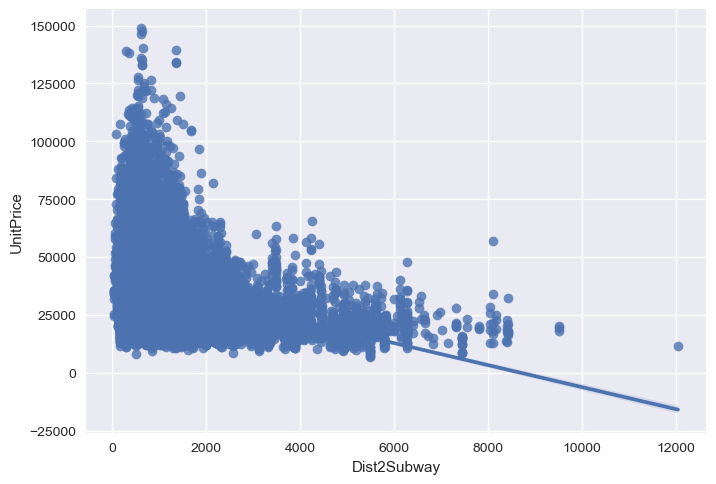

In [56]:
# basic plot using sns.regplot
sns.regplot(data = df_combine, x = "Dist2Subway", y = "UnitPrice")

Let us further customize scatter points and line
- `scatter_kws` (keyword arguments):  customize the style and appearance of the scatter points in the plot.
    - Scatter points are: Blue in color, Small in size (s=10), Semi-transparent (alpha=0.2).
- `line_kws`: customize the style and appearance of the regression line.
    - `color`: Specifies the color of the line (e.g., 'red'); `linewidth`: Sets the thickness of the line; `linestyle`: Adjusts the style of the line (e.g., dashed --, solid -); `alpha`: Controls the transparency of the line (value between 0 an

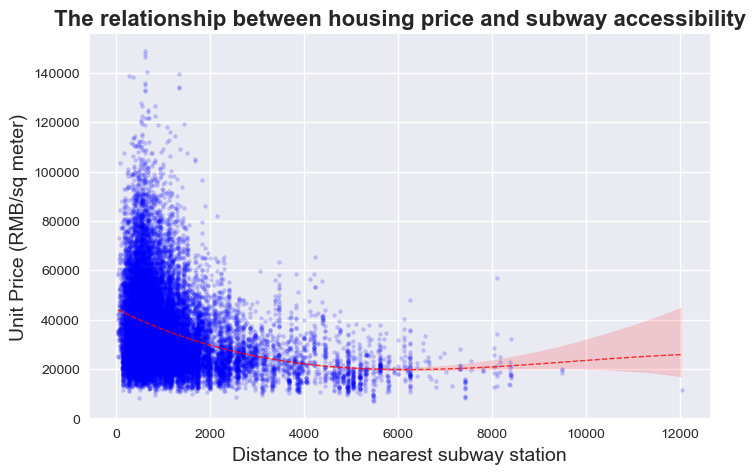

In [68]:
# Define Figure and Axes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

# Create a scatter plot with a trend line using Seaborn
sns.regplot(data=df_combine, x='Dist2Subway', y='UnitPrice', order=3,
            scatter_kws={'color': 'blue', 's': 10, 'alpha': 0.2}, 
            line_kws={
                'color': 'red',        # Line color
                'linewidth': 1,        # Line width
                'linestyle': '--',     # Line style
                'alpha': 0.8},           # Line transparency
            ax=ax)

# Customize the labels and title
ax.set_xlabel("Distance to the nearest subway station", fontsize=14)
ax.set_ylabel("Unit Price (RMB/sq meter)", fontsize=14)
ax.set_title("The relationship between housing price and subway accessibility", fontsize=16, fontweight='bold')

# Show the plot
plt.show()

## 3.2 Histograms and Density plots

In Matplotlib, we can use the function `df.plot(kind = "hist")` or `df.hist()` to generate histograms. 
- user guide: `df.hist()`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
- `df.plot()`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Let us plot the histogram of the UnitPrices of 2012. I use `df_combine.loc[ ]` to select the DataFrame of UnitPrice in 2012. 


<Axes: ylabel='Frequency'>

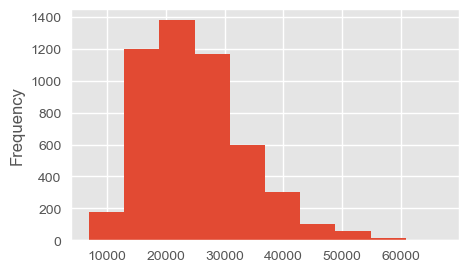

In [84]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (5,3))

# histogram: unit housing price 2012
df_combine.loc[df_combine["TransYear"] == 2012, "UnitPrice" ].plot(kind = "hist")

#df_combine.loc[df_combine["TransYear"] == 2012, "UnitPrice" ].hist()

The `hist()` function has many options to tune both the calculation and the display.

Let us plot the histogram of the UnitPrices of 2012 and 2016 in a single Axes to compare the price distribution between the two years. 
- In the `df.plot()`, the argument `label` specifies what will be shown in the figure **legend**. 
- `ax.legend()` places a legend on the Axes,  
- `fig.savfig()` saves the figure in the designated file folder. 

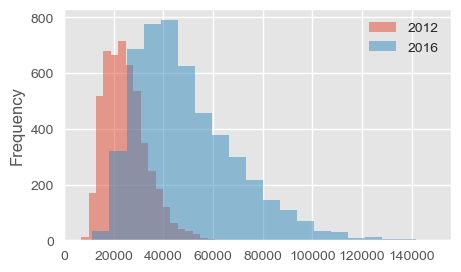

In [81]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (5,3))

# slice the housing price dataframe

df_combine.loc[df_combine["TransYear"] == 2012, "UnitPrice" ].plot(kind = "hist", 
                                                                   bins = 20, 
                                                                   label = "2012", 
                                                                   alpha = 0.5, 
                                                                   ax =ax)

df_combine.loc[df_combine["TransYear"] == 2016, "UnitPrice" ].plot(kind = "hist", 
                                                                   bins = 20, 
                                                                   label = "2016", 
                                                                   alpha = 0.5, 
                                                                   ax =ax)

                                                                   
ax.legend()                                                                                       
fig.savefig("hist.jpg")


#### Kernel density estimation using seaborn

- The `seaborn.histplot()` allows us for more advanced plotting options. Let us plot housing price distributions for all the years we have (2012-2016)  
    - `hue` in seaborn: differentiating data points based on the values of another variable. This is particularly useful for categorical variables, as it allows you to color code the data points or elements in the plot based on different categories.

Text(0, 0.5, 'Frequency')

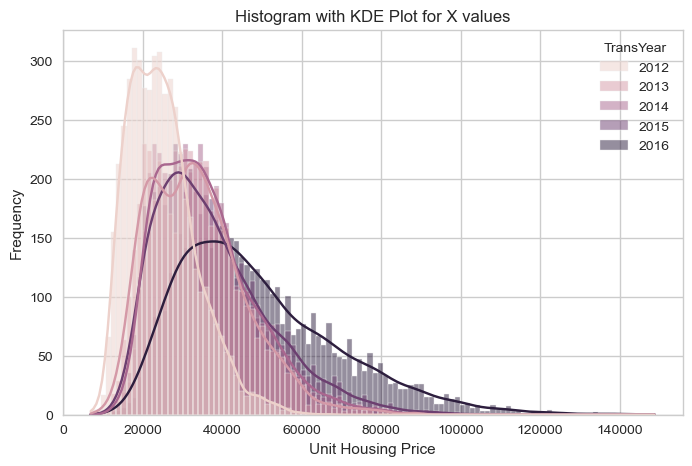

In [96]:
plt.style.use('seaborn-v0_8-whitegrid')

# Define Figure and Axes
fig, ax = plt.subplots(figsize=(8, 5))

# Add KDE plots using Seaborn
sns.histplot(data=df_combine, hue="TransYear", x="UnitPrice", kde = True,  ax = ax)

ax.set_title('Histogram with KDE Plot for X values')
ax.set_xlabel('Unit Housing Price')
ax.set_ylabel('Frequency')

We can also plot the kernel density estimates only using the function `kdeplot.()`
- [Palette](https://seaborn.pydata.org/tutorial/color_palettes.html): allows you to specify a color palette that will be used to color the different categories 
- Commonly-used palette: "viridis", "coolwarm", "Spectral", "Blues", "Set1".

<Axes: xlabel='UnitPrice', ylabel='Density'>

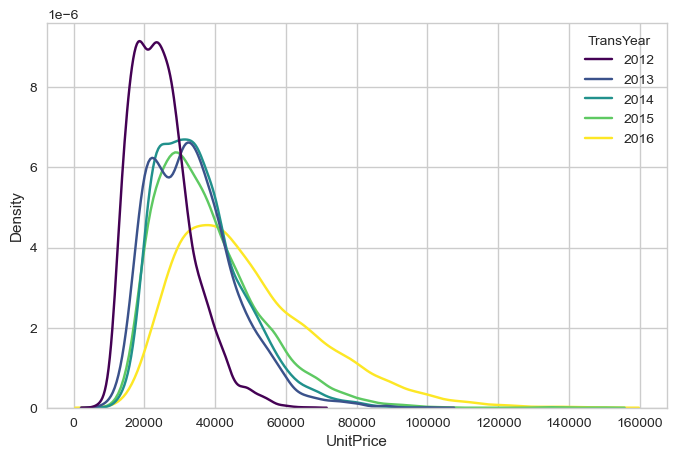

In [97]:
plt.style.use('seaborn-v0_8-whitegrid')

# Define Figure and Axes
fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(data=df_combine, hue="TransYear", x="UnitPrice", 
            palette="viridis",
            ax = ax)

## 3.3 Boxplots
Let us now visualize the relationship between housing price and Transaction years based on `sns.boxplot`. 
- user guide: http://seaborn.pydata.org/generated/seaborn.boxplot.html

Text(0, 0.5, 'UnitPrice')

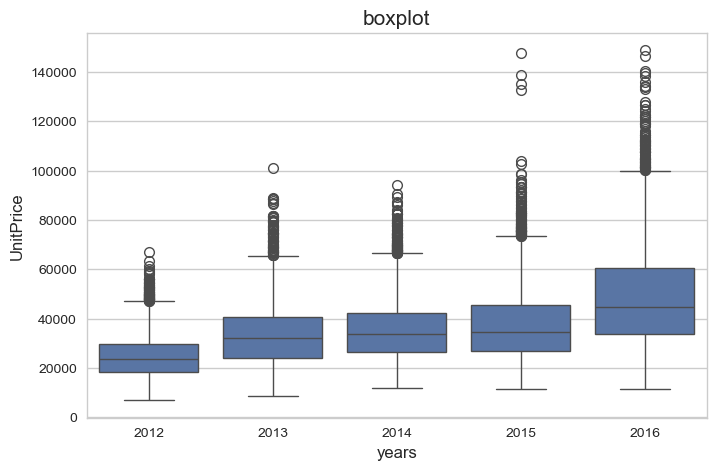

In [98]:
# Plotting the boxplot for housing prices by year
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(data = df_combine, x = "TransYear", y = "UnitPrice", ax = ax)
ax.set_title("boxplot", fontsize = 15)
ax.set_xlabel("years", fontsize = 12)
ax.set_ylabel("UnitPrice", fontsize = 12)

Let us explore the impacts of presence of elevator on housing price. We need to make sure the building heights are the same for comparison. This is because equipping an elevator for a 6-story building is much less important than 20-story buildings.
   - let us compare 6-story buildings only.
   - let us select four urban distrcit: ["Xicheng", "Dongcheng", "Chaoyang", "Haidian"]

In [99]:
# select buildings with 6-floors
df_subset = df_combine[df_combine["TotalFloor"] == 6]

urban_district = ["Xicheng", "Dongcheng", "Chaoyang", "Haidian"]
df_subset = df_subset[df_subset['DistName_En'].isin(urban_district)]

Text(0, 0.5, 'Price')

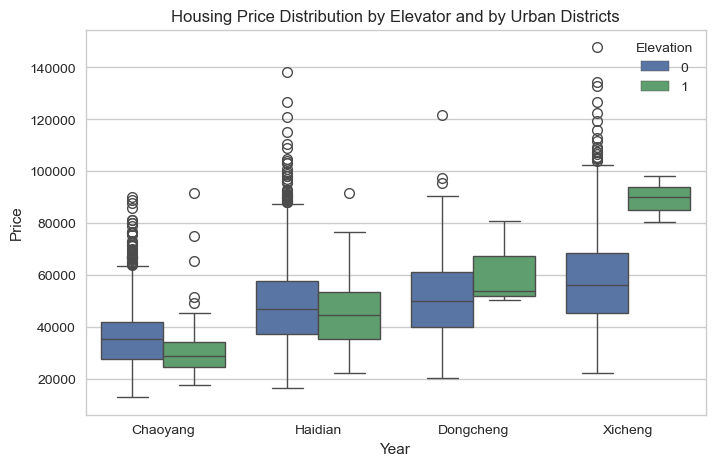

In [100]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df_subset, hue = "Elevation", x='DistName_En', y='UnitPrice', ax = ax)
ax.set_title('Housing Price Distribution by Elevator and by Urban Districts')
ax.set_xlabel('Year')
ax.set_ylabel('Price')

## 3.4 Barplot

A Bar Chart can be generated by the functions `df.plot(kind = "bar"), df.plot.bar()` or `sns.barplot()`, and it is frequently used together with `.groupby()` by visualizing the categorical data.

Let us first create a bar chart to visualize the Unit Housing Price categorized by districts.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Xicheng'),
  Text(1, 0, 'Dongcheng'),
  Text(2, 0, 'Haidian'),
  Text(3, 0, 'Chaoyang'),
  Text(4, 0, 'Fengtai'),
  Text(5, 0, 'Shijingshan'),
  Text(6, 0, 'Changping'),
  Text(7, 0, 'Yizhuang'),
  Text(8, 0, 'Daxing'),
  Text(9, 0, 'Fangshan'),
  Text(10, 0, 'Mentougou'),
  Text(11, 0, 'Tongzhou'),
  Text(12, 0, 'Shunyi')])

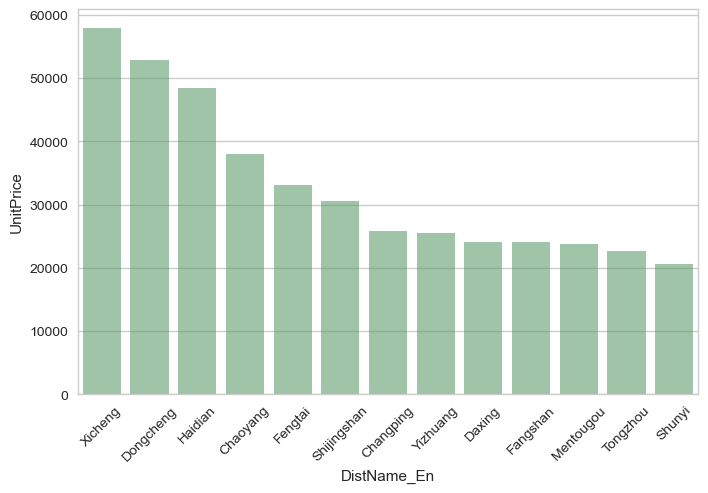

In [101]:
#plt.style.use('seaborn')

# groupby total floors
df_bar = df_combine.groupby("DistName_En")[["UnitPrice"]].mean()

# Sort the dataframe by UnitPrice in descending order
df_bar = df_bar.sort_values(by='UnitPrice', ascending=False).reset_index()

# note that the following code are written in .plt (Matlab-style)
# bar plot
plt.figure(figsize=(8, 5))
# df_bar.plot(kind = "bar", y=['UnitPrice'], rot=45, ax = ax)
sns.barplot(x='DistName_En', y='UnitPrice', data=df_bar,  color='g', alpha=0.6)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)


Now, let us make a bar chart depicting the **average housing price and the average total floors (building height)** among the inner city districts&mdash;Xicheng, Dongcheng, and the suburban districts&mdash;Fangshan and Changping. 

You may find the units measuring housing prices (RMB or yuan) and total floors are different, and that indicates you cannot use a single y-axis to present the two variables, as the unit of total floor is too small compared to yuan (Chinese dollars). To solve this issue, we can add an argument `secondary_y` that specifies the variable (UnitPrice or TotalFloor) to be plotted on the secondary y-axis. 

Now let us look at the housing price distribution by District. 

Text(0, 0.5, 'Your second Y-Axis Label goes here!')

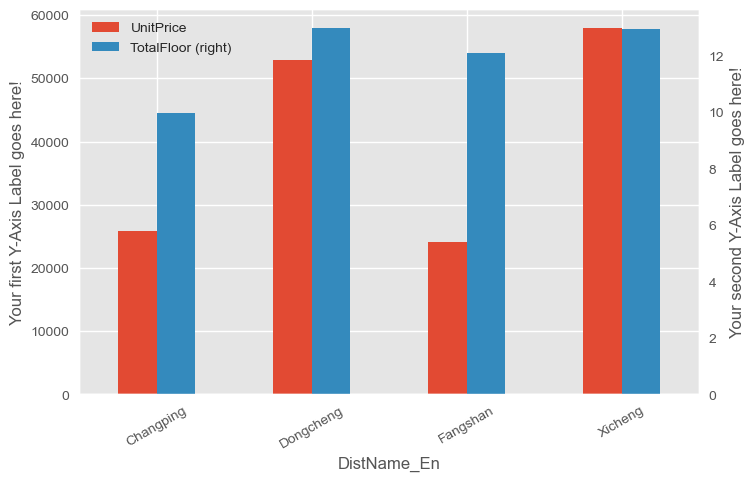

In [105]:
plt.style.use('ggplot')

# subset four districts: 
urban_district = ["Dongcheng", "Xicheng", "Fangshan", "Changping"]
df_subset = df_combine[df_combine["DistName_En"].isin(urban_district)]

# groupby housing price and total floors
df_bar = df_subset.groupby("DistName_En")[["UnitPrice", "TotalFloor"]].mean()

# bar plot
fig, ax = plt.subplots(figsize=(8, 5))
df_bar.plot(kind = "bar", y=['UnitPrice', 'TotalFloor'], secondary_y=['TotalFloor'],
               rot=30, ax = ax)

ax.set_ylabel('Your first Y-Axis Label goes here!')
ax.right_ax.set_ylabel('Your second Y-Axis Label goes here!')

#ax.right_ax.set_ylim(0, 25)
#ax.set_ylim(0, 90000)


Another more common method to solve the above question is to use `ax2 = ax.twinx()`. Google it if you have interest!

## 3.5 HeatMap

In our combined dataset, we can observe that the specific time of house transactions can be precise to the year-month-day. Now, we want to examine the trend of transaction prices (average value) for each month from January 2012 to December 2016. We can use either a Lineplot or a HeatMap to achieve this. Below, let us first see how to achieve this using Seaborn [HeatMap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).


In [83]:
df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean()

TransYear  TransMonth
2012       1             20994.907216
           2             20848.171340
           3             21974.028646
           4             23995.297158
           5             23252.150376
           6             24701.760536
           7             24653.476190
           8             25728.876316
           9             26256.133858
           10            26647.205128
           11            26660.713193
           12            27312.059701
2013       1             29222.855379
           2             29525.848101
           3             32781.868039
           4             31036.358079
           5             32852.268293
           6             34106.260309
           7             34565.777487
           8             35542.987705
           9             35327.773784
           10            36384.518817
           11            38677.685106
           12            37369.570064
2014       1             36732.762411
           2             371

In [106]:
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean().unstack()
# unstack() is used to reshape the DataFrame to have years as rows and months as columns.
df_avg_price

TransMonth            1             2             3             4   \
TransYear                                                            
2012        20994.907216  20848.171340  21974.028646  23995.297158   
2013        29222.855379  29525.848101  32781.868039  31036.358079   
2014        36732.762411  37127.168142  38259.949405  37597.541833   
2015        35277.508130  36191.621622  36440.494033  36753.658436   
2016        41049.658000  40952.325062  42813.606688  43904.129518   

TransMonth            5             6             7             8   \
TransYear                                                            
2012        23252.150376  24701.760536  24653.476190  25728.876316   
2013        32852.268293  34106.260309  34565.777487  35542.987705   
2014        37486.254181  35474.615625  34776.416201  33012.319239   
2015        37160.933045  35699.390728  36410.948661  38365.721277   
2016        46948.748634  47074.225064  48773.650909  51973.511692   

TransMonth            9             10            11            12  
TransYear                                                           
2012        26256.133858  26647.205128  26660.713193  27312.059701  
2013        35327.773784  36384.518817  38677.685106  37369.570064  
2014        34025.622912  35511.156484  35721.983022  35694.235409  
2015        39283.283237  38043.903646  37868.710417  40340.482496  
2016        59690.908360  60997.125828  59054.905797  60737.208333

- [unstack()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html): pivot the `innermost` level (default, level = -1) of a hierarchical row index into column labels. It is commonly used for reshaping data from a stacked to an unstacked (or wide) format.

<table>
    <tr>
        <th>Original Table</th>
        <th>Unstacked Table (level = -1)</th>
        <th>Unstacked Table (level = 0)</th>
    </tr>
    <tr>
        <td>
            <table>
                <tr>
                    <th style="background-color: #f0f8ff;">Year</th>
                    <th style="background-color: #f0f8ff;">Category</th>
                    <th>Value</th>
                </tr>
                <tr>
                    <td style="background-color: #f0f8ff;">2020</td>
                    <td style="background-color: #f0f8ff;">A</td>
                    <td>100</td>
                </tr>
                <tr>
                    <td style="background-color: #f0f8ff;">2020</td>
                    <td style="background-color: #f0f8ff;">B</td>
                    <td>200</td>
                </tr>
                <tr>
                    <td style="background-color: #f0f8ff;">2021</td>
                    <td style="background-color: #f0f8ff;">A</td>
                    <td>150</td>
                </tr>
                <tr>
                    <td style="background-color: #f0f8ff;">2021</td>
                    <td style="background-color: #f0f8ff;">B</td>
                    <td>250</td>
                </tr>
            </table>
        </td>
        <td>
            <table>
                <tr>
                    <th style="background-color: #f0f8ff;">Year</th>
                    <th>A</th>
                    <th>B</th>
                </tr>
                <tr>
                    <td style="background-color: #f0f8ff;">2020</td>
                    <td>100</td>
                    <td>200</td>
                </tr>
                <tr>
                    <td style="background-color: #f0f8ff;">2021</td>
                    <td>150</td>
                    <td>250</td>
                </tr>
            </table>
        </td>
        <td>
            <table>
                <tr>
                    <th style="background-color: #f0f8ff;">Category</th>
                    <th>2020</th>
                    <th>2021</th>
                </tr>
                <tr>
                    <td style="background-color: #f0f8ff;">A</td>
                    <td>100</td>
                    <td>150</td>
                </tr>
                <tr>
                    <td style="background-color: #f0f8ff;">B</td>
                    <td>200</td>
                    <td>250</td>
                </tr>
            </table>
        </td>
    </tr>
</table>


Text(197.72222222222223, 0.5, 'Year')

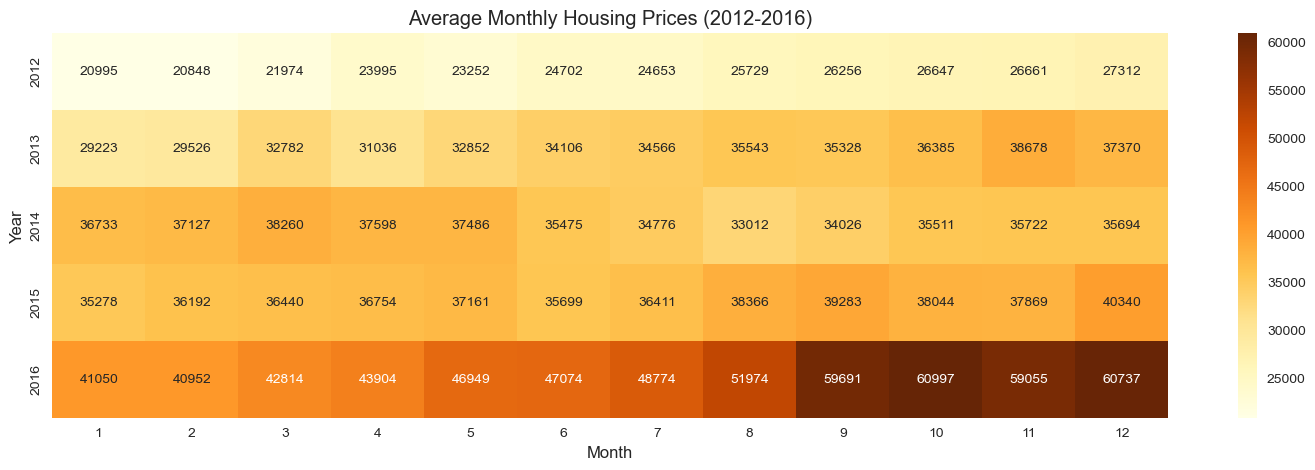

In [108]:
plt.style.use('seaborn-v0_8-whitegrid')

# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean().unstack()

# Plotting the heatmap
plt.figure(figsize=(18, 5))
sns.heatmap(df_avg_price, annot =True , fmt=".0f", cmap='YlOrBr')
plt.title('Average Monthly Housing Prices (2012-2016)')
plt.xlabel('Month')
plt.ylabel('Year')

## 3.6 Lineplot

Now let us use [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to examine the trend of transaction prices (average value) for each month from January 2012 to December 2016.

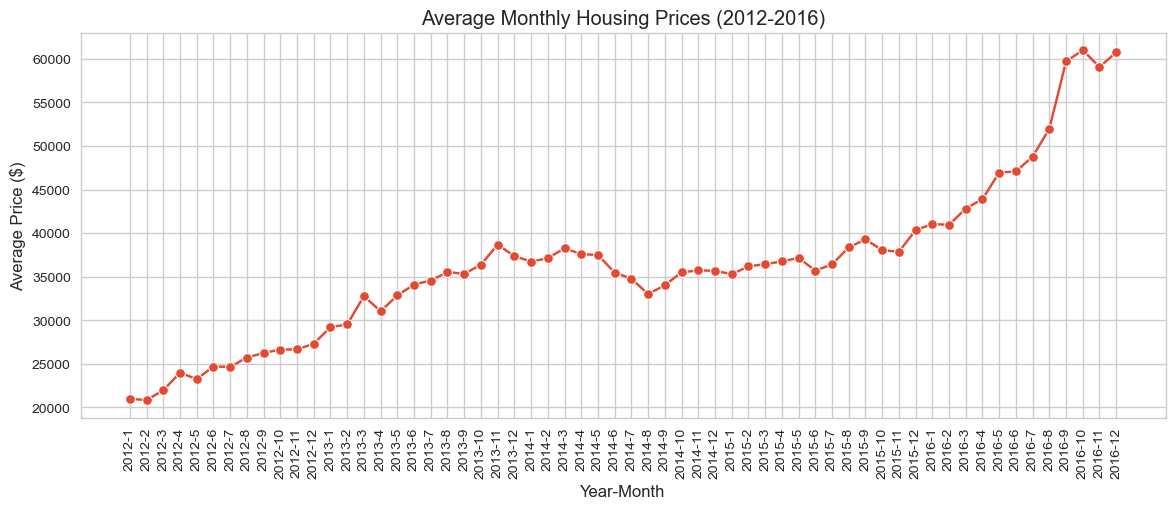

In [120]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean().reset_index()

# Combine year and month into a single column for plotting
df_avg_price['year_month'] = df_avg_price['TransYear'].astype(str) + '-' + df_avg_price['TransMonth'].astype(str)

# df_avg_price['year_month'] = pd.to_datetime(df_avg_price['TransYear'].astype(str) + 
#                                             '-' + df_avg_price['TransMonth'].astype(str) + 
#                                             '-01')

# Plotting the line plot
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_avg_price, x='year_month', y='UnitPrice', marker='o')
plt.title('Average Monthly Housing Prices (2012-2016)')
plt.xlabel('Year-Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

## 9. Combined Plots
We can generate a combined figure with multiple plots in a single figure. For example, in the following code, we create four Axes (plots) and each of them showing different kinds of plot. The `nrows = 2, ncols = 2` means creating a figure with two rows and two columns, and arrange the Axes just like the elements in a 2 by 2 matrix.   

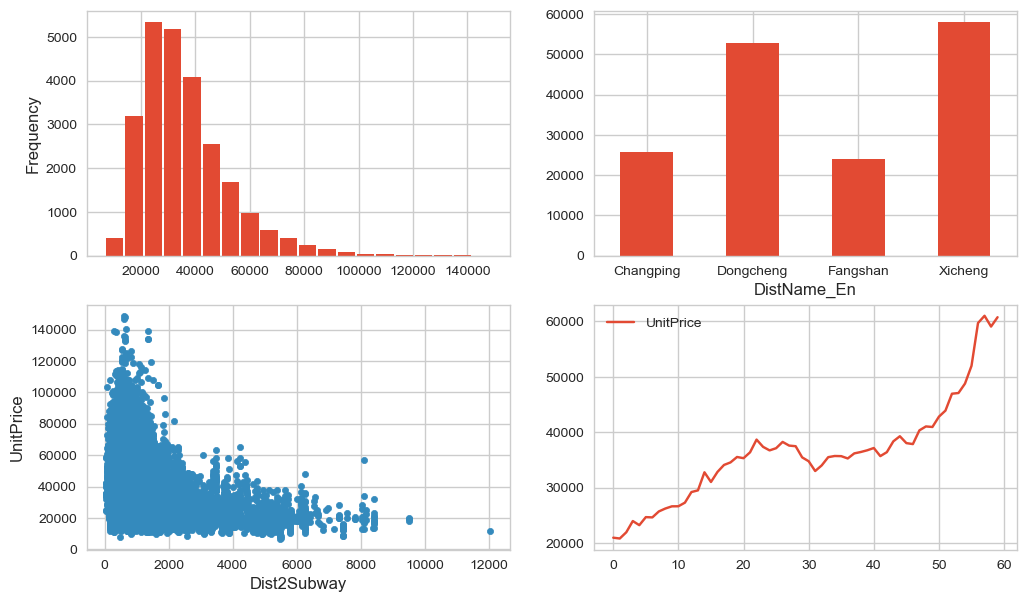

In [117]:
# create fig and ax
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,7))

# add histogram to first row first col
df_combine["UnitPrice"].plot(kind = "hist", bins = 20, rwidth = 0.9, ax = ax[0][0])
# assign ax to be the specific Axes object located at the first row and first column of the grid.

# add bar chart to first row second col (using df_bar)
df_bar["UnitPrice"].plot(kind = "bar", rot = 0,  ax = ax[0][1])

# add scatter plot to second row second col
df_combine.plot(kind = "scatter", x = "Dist2Subway", y = "UnitPrice", ax = ax[1][0])

# add line plot to second row second col
df_avg_price.plot(kind = "line", y = "UnitPrice", ax = ax[1][1])

# save figure
plt.savefig("combine_plot.tif", dpi = 200)

We can create five lineplots, showing the housing price change from January to December for each year. 

- In the following code, we create five Axes (plots). The `nrows = 5, ncols = 1` means creating a figure with five rows and one columns, and arrange the Axes just like the elements in a 5 by 1 matrix.    

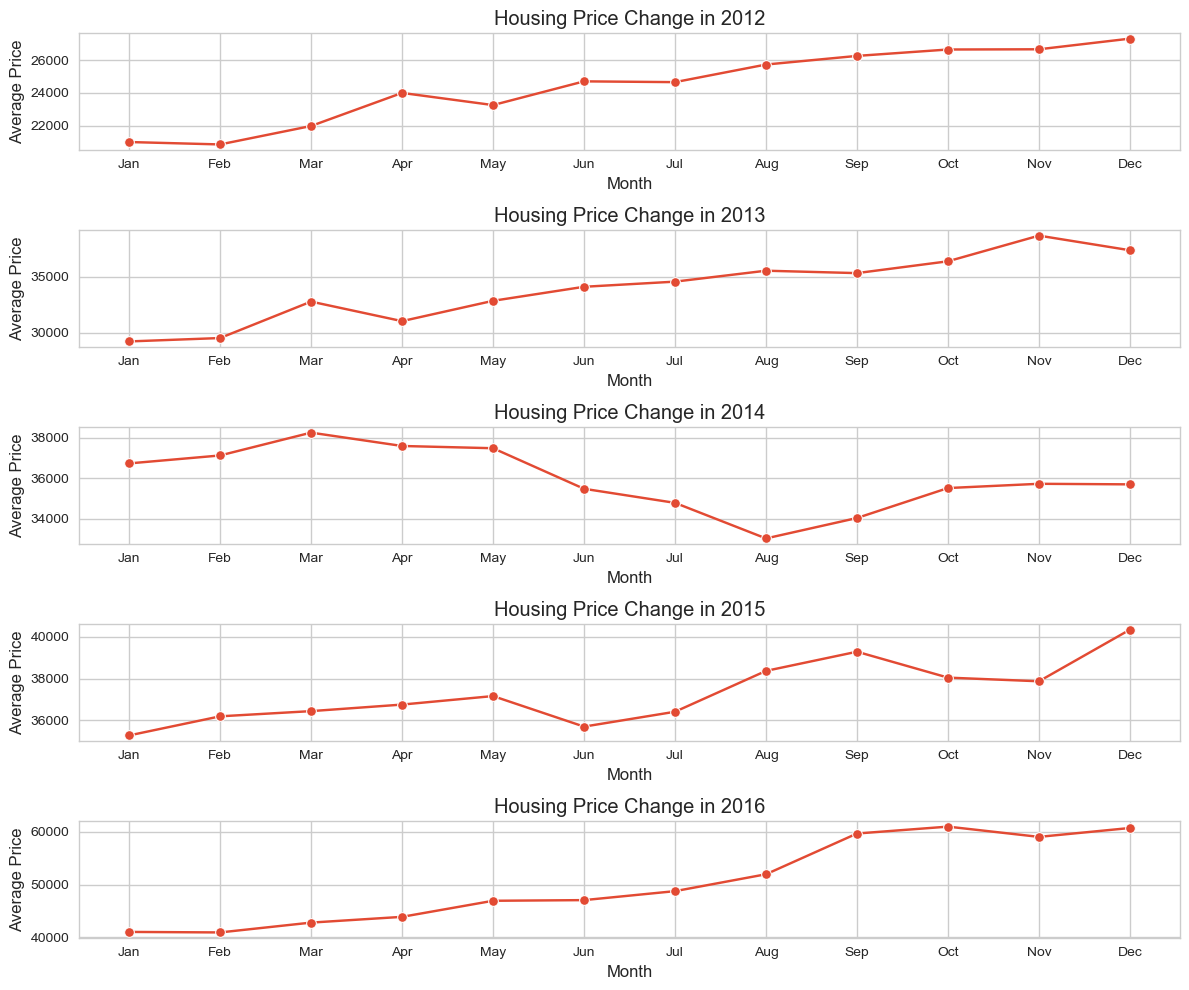

In [118]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean().reset_index()

# Set up the subplots
fig, ax = plt.subplots(5, 1, figsize=(12, 10)) 

# Create lineplots for each year
years = [2012, 2013, 2014, 2015, 2016]

for i, year in enumerate(years):  # enumerate(): keep track of both the index and the value while iterating over the list.
    
    sns.lineplot(data=df_avg_price[df_avg_price['TransYear'] == year], x='TransMonth', y='UnitPrice', marker='o', ax=ax[i])
    ax[i].set_title('Housing Price Change in ' + str(year))
    ax[i].set_xlabel('Month')
    ax[i].set_ylabel('Average Price')
    ax[i].set_xticks(range(1, 13))
    ax[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout() # adjust the layout without overlapping
plt.show() # displays figures and renders the plots on the screen.

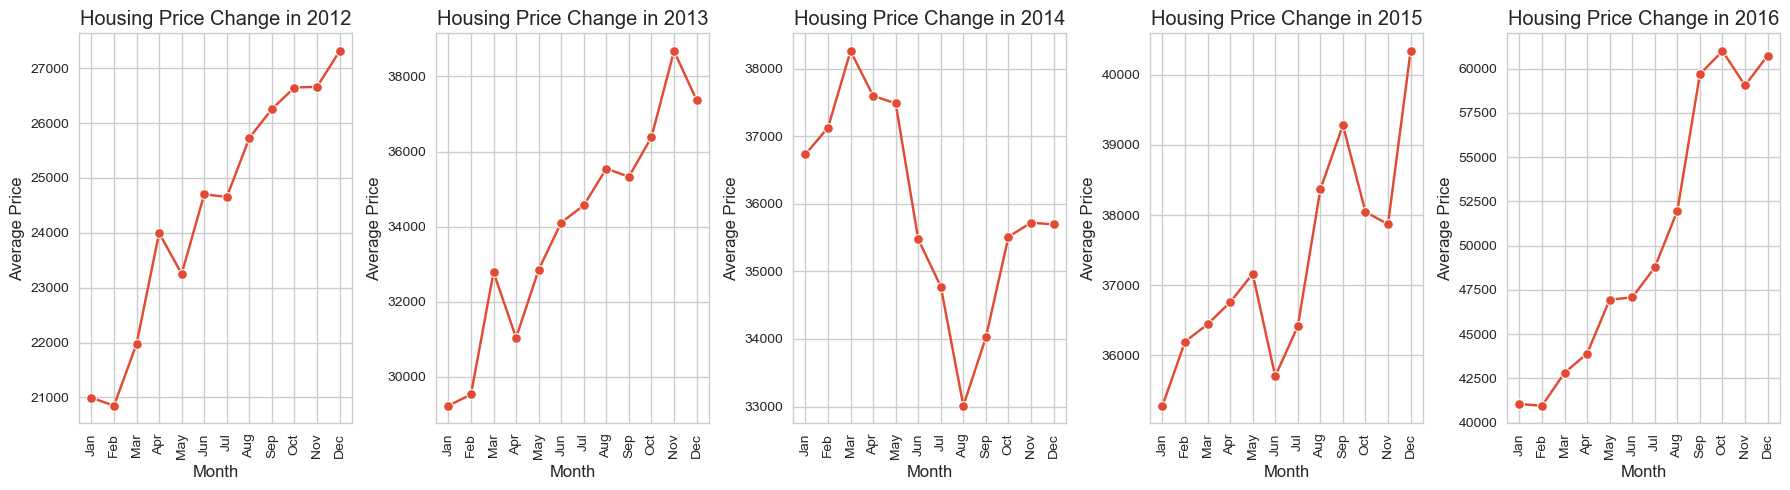

In [119]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean().reset_index()

# Set up the subplots
fig, ax = plt.subplots(1, 5, figsize=(18, 5))  # Adjust the size as needed

# Create lineplots for each year
years = [2012, 2013, 2014, 2015, 2016]

for i, year in enumerate(years):
    
    sns.lineplot(data=df_avg_price[df_avg_price['TransYear'] == year], x='TransMonth', y='UnitPrice', marker='o', ax=ax[i])
    ax[i].set_title('Housing Price Change in ' + str(year))
    ax[i].set_xlabel('Month')
    ax[i].set_ylabel('Average Price')
    ax[i].set_xticks(range(1, 13))
    ax[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax[i].tick_params(axis='x', rotation=90) # customize the tick marks on the axes
    
plt.tight_layout()
    
plt.show()

The following code ensures that all subplots share the same y title, y label, and y tick labels. 

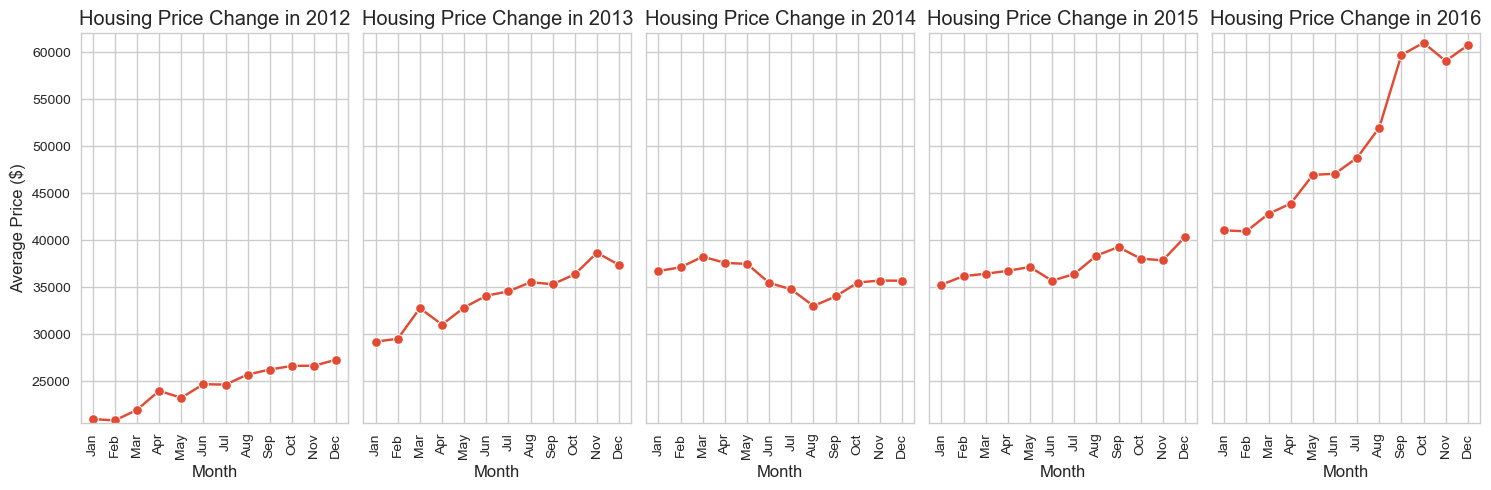

In [124]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].mean().reset_index()

# Set up the subplots
fig, ax = plt.subplots(1, 5, figsize=(15, 5)) 

# Create lineplots for each year
years = [2012, 2013, 2014, 2015, 2016]

y_limits = []

for i, year in enumerate(years):
    
    sns.lineplot(data=df_avg_price[df_avg_price['TransYear'] == year], x='TransMonth', y='UnitPrice', marker='o', ax=ax[i])
    
    if i == 0:
        ax[i].set_ylabel('Average Price ($)')
    else:
        ax[i].set_ylabel('')
        ax[i].set_yticklabels([]) 
    ax[i].set_xlabel('Month')
    ax[i].set_xticks(range(1, 13))
    ax[i].tick_params(axis='x', rotation=90) 
    ax[i].set_title('Housing Price Change in ' + str(year))
    ax[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    y_limits.append(ax[i].get_ylim())  
    # retrieve the current limits of the y-axis, return a tuple (minimum, maximum) 

# Set the same y-axis limits for all plots
y_min = min([limit[0] for limit in y_limits])
y_max = max([limit[1] for limit in y_limits])

for i in range(len(years)):
    ax[i].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

## 10. Figure-level plots versus axes-level plots (in seanborn)

All the functions we introduced above are **axes-level plot functions**. They operate on a specific `matplotlib.axes.Axes` object, and allow for greater control and customization of individual **subplots** within a figure. Simply speaking, **axes-level plot functions** allow us to combine multiple plots and tailor our subplots, just like what we did above. 

In contrast, **figure-level functions** interface with matplotlib through a seaborn object, usually a `FacetGrid`, that manages the figure. Each module has a single figure-level function, suggesting that it cannot (easily) be composed with other plots.. 

The following example using a figure-level function `joinplot()` to display the relationship between distance to subway station and housing price combining scatterplots and kernel density estimates. 

For more about figure-level plots, find: https://seaborn.pydata.org/tutorial/function_overview.html

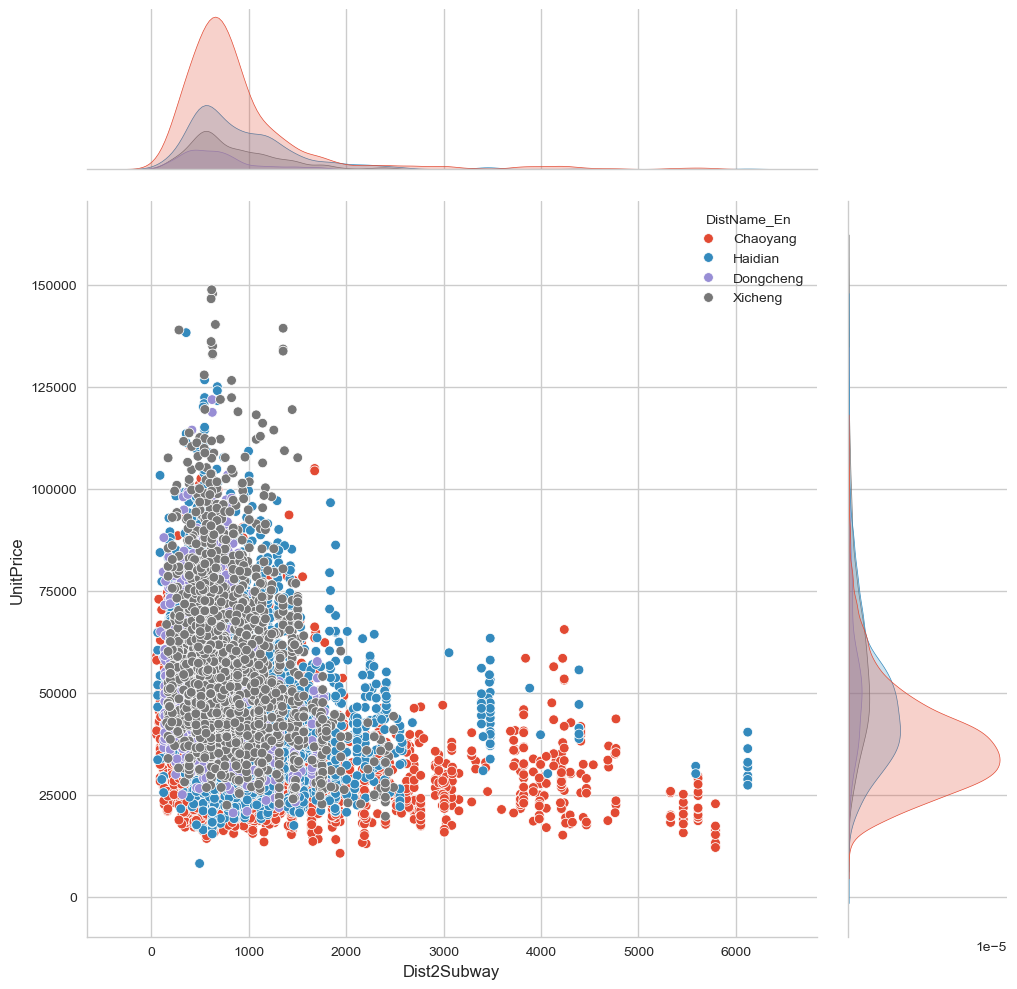

In [126]:
urban_district = ["Xicheng", "Dongcheng", "Chaoyang", "Haidian"]
df_subset = df_combine[df_combine['DistName_En'].isin(urban_district)]

sns.jointplot(data=df_subset, x="Dist2Subway", y="UnitPrice", hue='DistName_En', height=10, ratio=4)

## 11. interactive and dynamic visualization 

Here, we briefly introduce two interactive plotting tools: Bokeh.

Bokeh is a Python library focusing on interactive visualization. This example shows how to add tooltips to the scatter plot between housing prices and distances to the nearest subway stations using Bokeh. More examples and further learning about Bokeh can be found in its website https://bokeh.pydata.org/.

In [127]:
# import library and modules
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.io import output_notebook

In [140]:
# define output file name (.html)
output_file('price_subway.html')

# allow display in Jupyter Notebook
output_notebook()

df_2012 = df_combine[df_combine.TransYear == 2012]

# use dataframe as source
source = ColumnDataSource(df_2012)

# add plot
p = figure(
    title = 'Correlation',
    x_axis_label = 'Distance to Subway (meter)',
    y_axis_label = 'Housing Price (RMB/sq m)',
    tools = "pan, zoom_in, zoom_out, box_select, reset, save"
)

# create a scatter plot
p.scatter(x = 'Dist2Subway', 
          y = 'UnitPrice',
          source = source
)

# add tooltips
hover = HoverTool() # Creates an instance of the HoverTool
hover.tooltips = [("Dist to Subway", "@Dist2Subway"), ("Housing Prices", "@UnitPrice")] # Specifies the content of the tooltip.
p.add_tools(hover)
show(p)

Loading BokehJS ...

Check your working folder. Do you see a new html file? Open it and see what is inside!

## In-class exercise (due Feb 13th)
(1) visualize the relationship between unit housing price (UnitPrice) and the number of bedrooms (Bedroom) (choose a visualization method of your favorite)

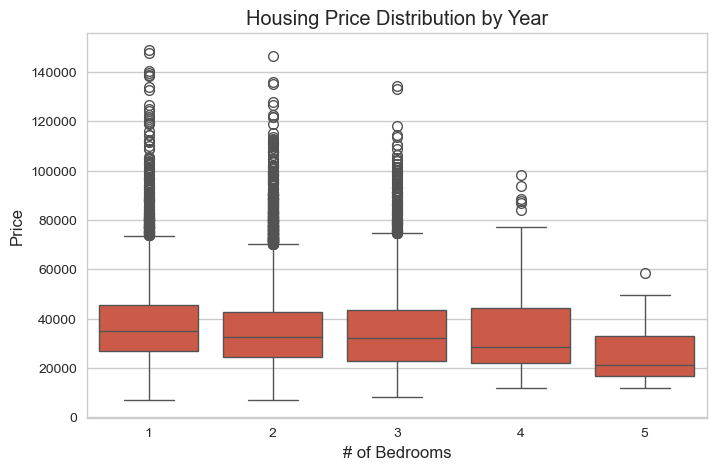

In [150]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_combine, x='Bedroom', y='UnitPrice')
plt.title('Housing Price Distribution by Year')
plt.xlabel('# of Bedrooms')
plt.ylabel('Price')
plt.show()


(2) **optional**: visualize the relationship between unit housing price (UnitPrice) and the districts (DistName_En)

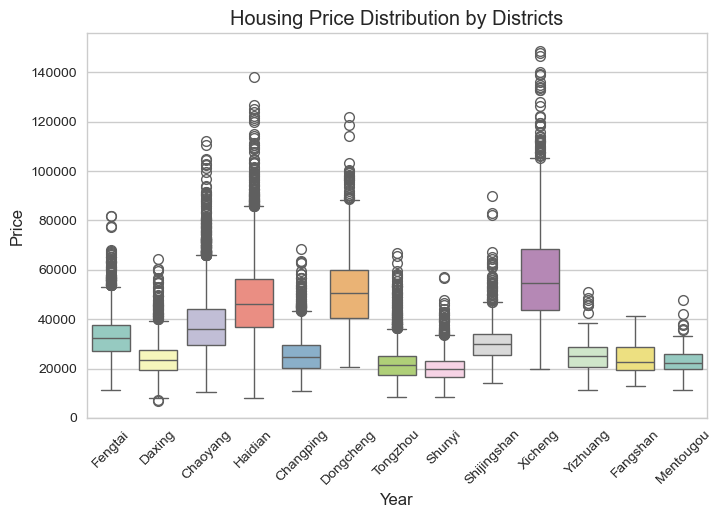

In [151]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_combine, x='DistName_En', y='UnitPrice', palette='Set3')
plt.title('Housing Price Distribution by Districts')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

(3) **optional**: visualize the houisng price change between 2012-2016 for the district Xicheng

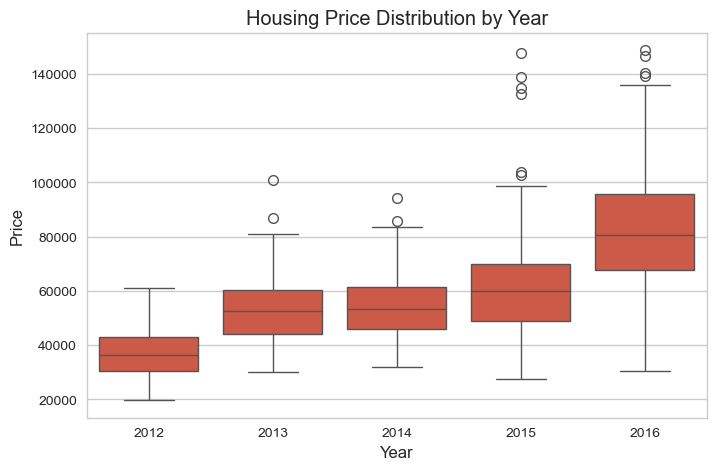

In [152]:
plt.figure(figsize=(8, 5))

df_xicheng = df_combine[df_combine['DistName_En'] == 'Xicheng']

sns.boxplot(data=df_xicheng, x='TransYear', y='UnitPrice')
plt.title('Housing Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

(4) visualize the houisng price change between 2012-2016 for the district Xicheng, Dongcheng, Chaoyang, and Haidian (all in the same figure)

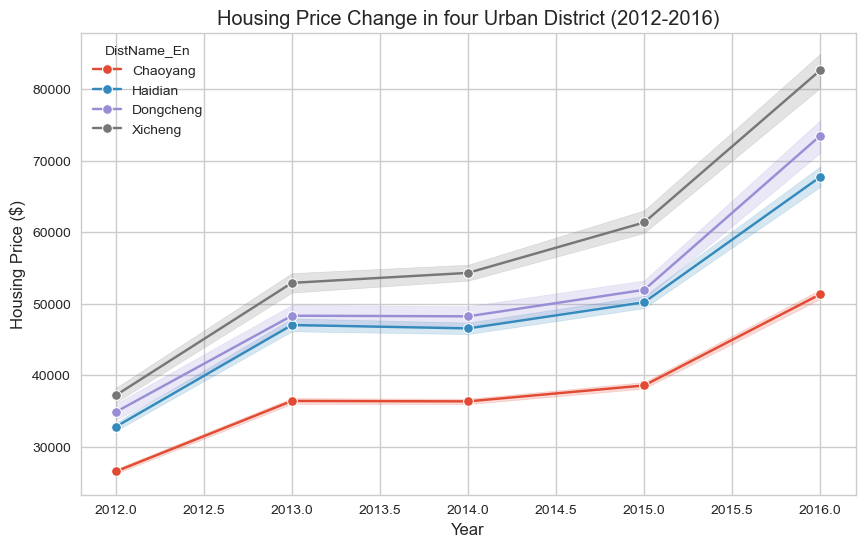

In [153]:
urban_district = ["Xicheng", "Dongcheng", "Chaoyang", "Haidian"]

df_selectdist = df_combine[df_combine["DistName_En"].isin(urban_district)] 
# df_selectdist['TransYear'] = df_selectdist['TransYear'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_selectdist, x='TransYear', y='UnitPrice', hue = "DistName_En", marker='o')
plt.title('Housing Price Change in four Urban District (2012-2016)')
plt.xlabel('Year')
plt.ylabel('Housing Price ($)')
plt.grid(True)
plt.show()


(5) **optional**: visualize the relationship between unit housing price (UnitPrice) and the distance to CBD. 

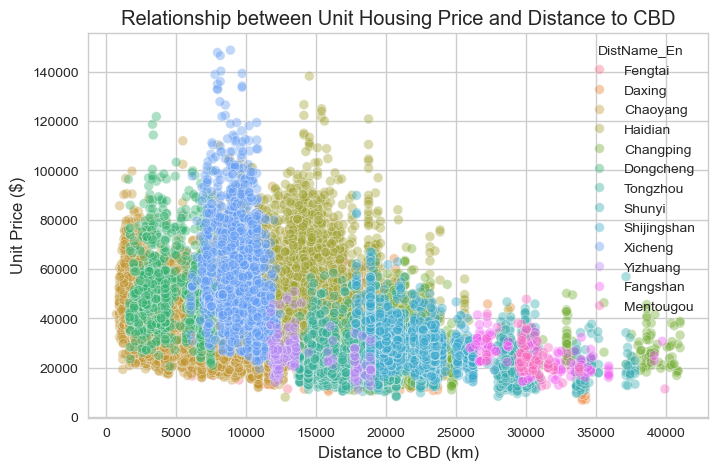

In [154]:
# Plotting the scatter plot for unit housing prices vs distance to CBD
plt.figure(figsize=(8, 5))

sns.scatterplot(data=df_combine, x='Dist2CBD', y='UnitPrice', hue = "DistName_En", alpha = 0.4)

plt.title('Relationship between Unit Housing Price and Distance to CBD')
plt.xlabel('Distance to CBD (km)')
plt.ylabel('Unit Price ($)')
plt.show()

(6) **optional**: show the transaction counts by month from Jan 2012 to Dec 2016

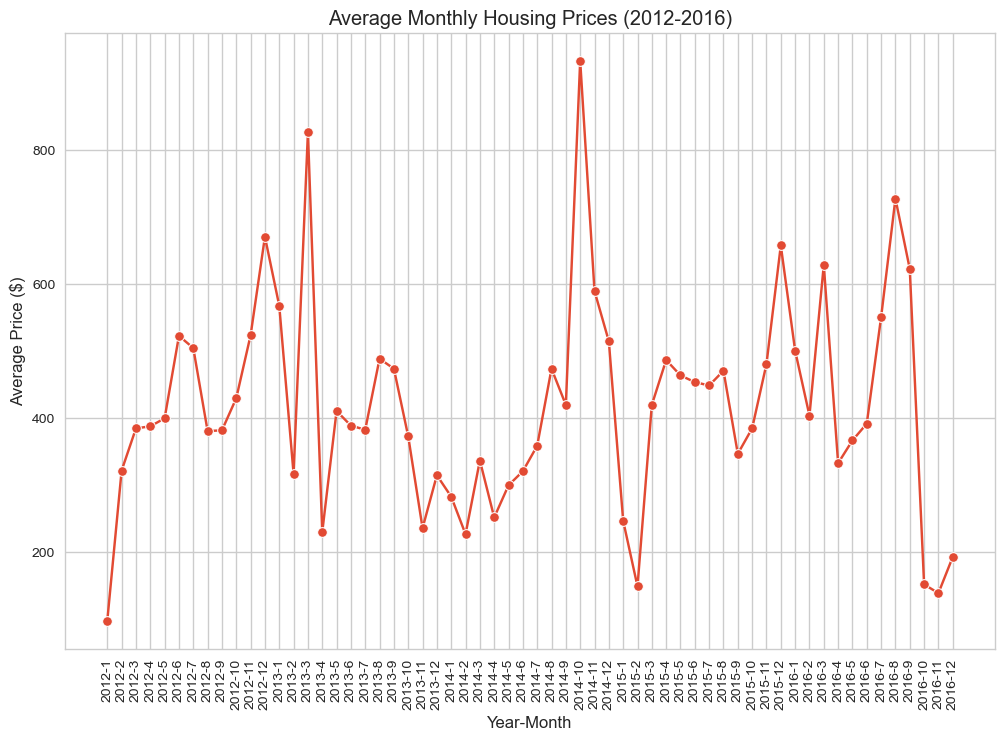

In [155]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].count().reset_index()

# Combine year and month into a single column for plotting
df_avg_price['year_month'] = df_avg_price['TransYear'].astype(str) + '-' + df_avg_price['TransMonth'].astype(str)

# df_avg_price['year_month'] = pd.to_datetime(df_avg_price['TransYear'].astype(str) + 
#                                             '-' + df_avg_price['TransMonth'].astype(str) + 
#                                             '-01')

# Plotting the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_avg_price, x='year_month', y='UnitPrice', marker='o')
plt.title('Average Monthly Housing Prices (2012-2016)')
plt.xlabel('Year-Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

Text(122.72222222222221, 0.5, 'Year')

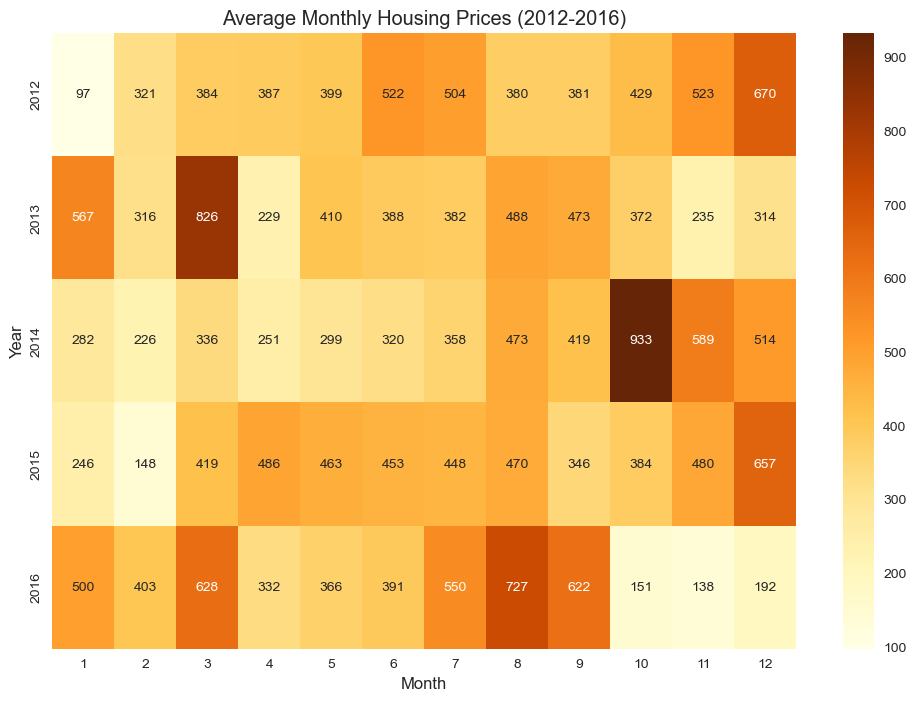

In [156]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].count().unstack()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_avg_price, annot=True, fmt=".0f", cmap='YlOrBr')
plt.title('Average Monthly Housing Prices (2012-2016)')
plt.xlabel('Month')
plt.ylabel('Year')


(7) **optional (will be in assignment 2)**: last week, we brlefly discussed about the influence of the relative height of floors on housing price. We proposed the argument that: 
   - High-floor dwelling units offer many benefits, such as reduced exposure to traffic pollution and noise, decreased security risks, scenic views, and emotional superiority for being higher up relative to others. [see this paper](https://open.library.ubc.ca/soa/cIRcle/collections/facultyresearchandpublications/52383/items/1.0433565)
   - However, the disadvantages are also apparent, including the vertical commuting costs and the potential hazards of top floors in case of rain leakages, fire, or other emergencies. 
   
- So, now we want to explore the relationship between the relative floor level and unit housing price.
In the dataset, we have a column named **FloorLevel**, which is in 5 levels from 1 to 5. The meaning of these numbers are:
    - 1: the ground floor - the very first floor of a building;
    - 2: the low floor - the bottom third of a building's total number of floors
    - 3: the middle floor - the middle third of a building's total number of floors
    - 4: the high floor - the top third of a building's total number of floors
    - 5: the top floor - the highest floor
      
**7a**: Using the 2016 housing transaction dataset, visualize the relationship between `FloorLevel` and `UnitPrice`, using whatever methods you like.

- Note: students may use the barplot, which need to firstly groupby the unitprice to average price; or students may directly use the boxplots...this question opens to other solutuions. 

Text(0, 0.5, 'UnitPrice')

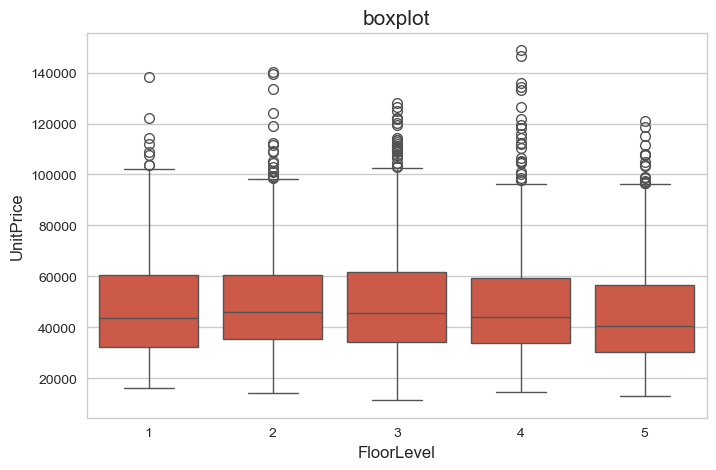

In [147]:
# Plotting the boxplot for housing prices by year
fig, ax = plt.subplots(figsize=(8, 5))
df_2016 = df_combine[df_combine.TransYear == 2016]
sns.boxplot(data = df_2016, x = "FloorLevel", y = "UnitPrice", ax = ax)
ax.set_title("boxplot", fontsize = 15)
ax.set_xlabel("FloorLevel", fontsize = 12)
ax.set_ylabel("UnitPrice", fontsize = 12)

In [148]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2616 to 24996
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     5000 non-null   int64  
 1   HouseID        5000 non-null   object 
 2   CommunityID    5000 non-null   int64  
 3   TotalPrice     5000 non-null   float64
 4   TransYear      5000 non-null   int64  
 5   Bedroom        5000 non-null   int64  
 6   Livingroom     5000 non-null   int64  
 7   Bathroom       5000 non-null   int64  
 8   Size           5000 non-null   float64
 9   FloorLevel     5000 non-null   int64  
 10  WinSouth       5000 non-null   int64  
 11  WinSouthNorth  5000 non-null   int64  
 12  Decoration     5000 non-null   int64  
 13  TotalFloor     5000 non-null   int64  
 14  BuiltYear      5000 non-null   int64  
 15  Elevation      5000 non-null   int64  
 16  Heating        5000 non-null   int64  
 17  TransMonth     5000 non-null   int64  
 18  TransDay 

Besides the relative floor level (`FloorLevel`), the total building height (`TotalFloor`) may also play a significant role in influencing housing prices. For instance, the feeling of living on the top floor of a 6-story building is completely different from living on the top floor of a 40-story building. Furthermore, elevators are closely tied to building height and can also impact housing prices. In Beijing, residential buildings with more than 6 floors are required by law to have elevators, whereas the majority of residential buildings with 6 floors or fewer typically do not have elevators.

Based on this, finish the following questions:

**7b(1)**: Create a New Categorical Variable: Classify the total number of floors into three levels:

- Level 1: Buildings with 1-6 floors.
- Level 2: Buildings with 7-18 floors (inclusive of 7 and 18).
- Level 3: Buildings with 19 floors or more.

**7b(2)**: Visualize the housing prices of the relative `FloorLevel` for each level (1,2,3) to analyze how the relationship between `FloorLevel` and `UnitPrice` may change due to the absolute building height `TotalFloor`. 

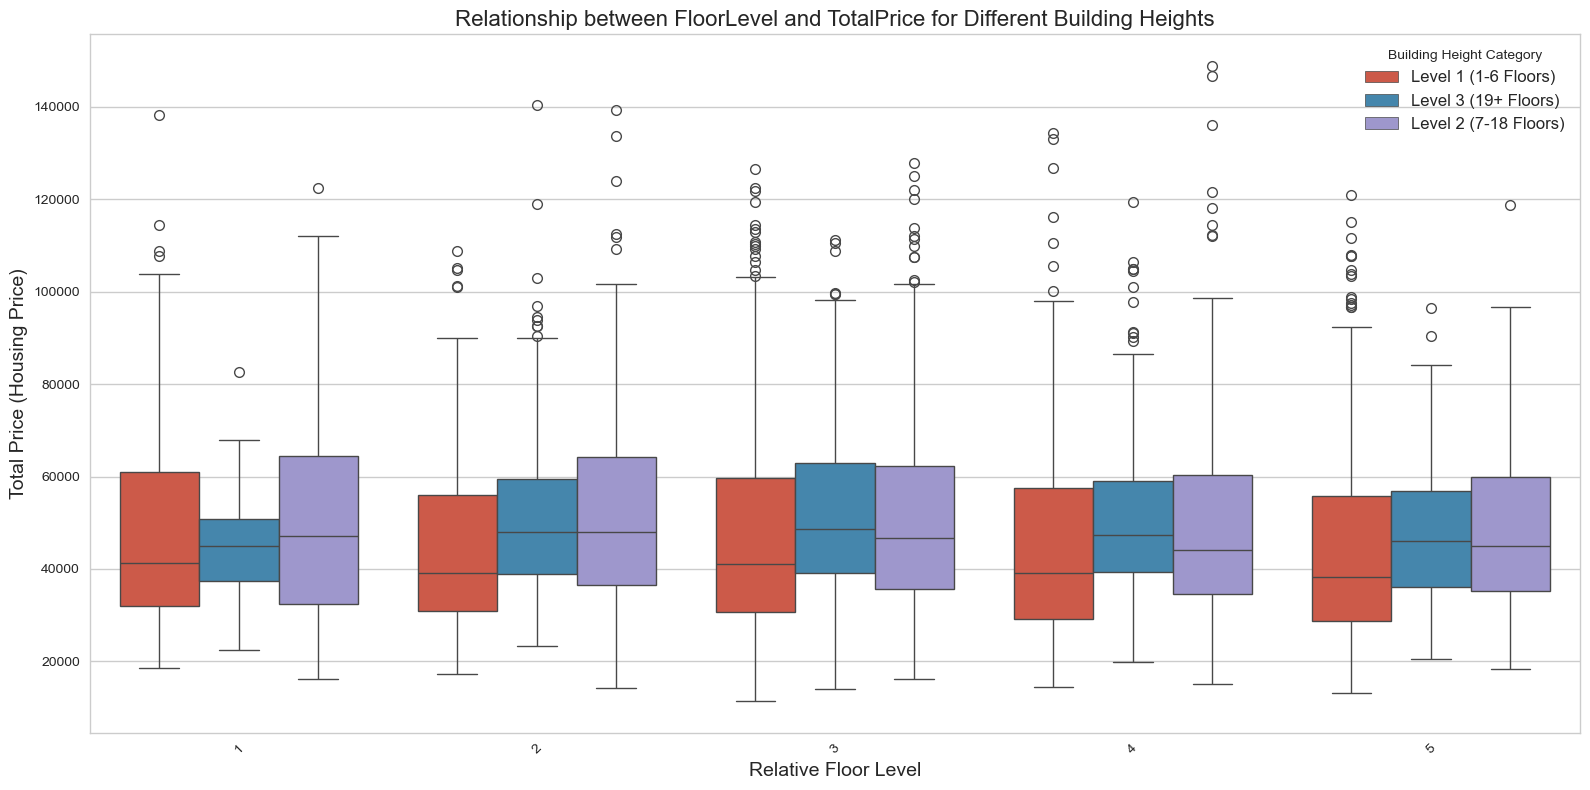

In [149]:

# Step 1: Create a new categorical variable for TotalFloor levels
def categorize_total_floor(floor):
    if floor <= 6:
        return 'Level 1 (1-6 Floors)'
    elif 7 <= floor <= 18:
        return 'Level 2 (7-18 Floors)'
    else:
        return 'Level 3 (19+ Floors)'

df_2016['TotalFloorCategory'] = df_2016['TotalFloor'].apply(categorize_total_floor)

# Step 2: Visualize the relationship between FloorLevel and TotalPrice for each TotalFloor category
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_2016, x='FloorLevel', y='UnitPrice', hue='TotalFloorCategory')
plt.title('Relationship between FloorLevel and TotalPrice for Different Building Heights', fontsize=16)
plt.xlabel('Relative Floor Level', fontsize=14)
plt.ylabel('Total Price (Housing Price)', fontsize=14)
plt.legend(title='Building Height Category', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()